In [ ]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

import re
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install .

nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

Cloning into 'word_cloud'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 6213 (delta 43), reused 58 (delta 7), pack-reused 6089
Receiving objects: 100% (6213/6213), 113.64 MiB | 31.17 MiB/s, done.
Resolving deltas: 100% (3651/3651), done.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import collections

In [ ]:
data = pd.read_csv('./Fake Detection/Dataset/')
data.head()

FileNotFoundError: ignored

In [ ]:
# Cleaning the text, stemming, tokenization etc
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\']+"      # regular expression to remove un-necessary stuff
def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:                                # Removing the stop words
            tokens.append(token)
    text = " ".join(tokens)
    return text

In [ ]:
# Real news data having label 0
real = data[data.label == 0]
# Fake news data having label 1
fake = data[data.label == 1]

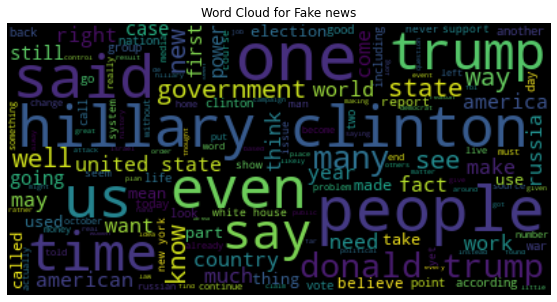

In [ ]:
fake.text = fake.text.apply(lambda x: preprocess(x))                # pre-processing the data

text = " ".join(cl for cl in fake.text)
words = text.split(' ')                                             # splitting the words
counts_no_urls = collections.Counter(words)                         # counting the words

wordcloud = WordCloud(max_font_size=50, max_words=220, background_color="black").generate(text)     # generating the wordcloud
plt.figure(figsize = (10, 5))
plt.title('Word Cloud for Fake news')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

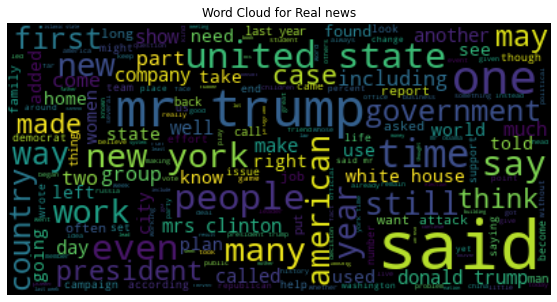

In [ ]:
real.text = real.text.apply(lambda x: preprocess(x))

text = " ".join(cl for cl in real.text)
words = text.split(' ')
counts_no_urls = collections.Counter(words)

wordcloud1 = WordCloud(max_font_size=50, max_words=220, background_color="black").generate(text)
plt.figure(figsize = (10, 5))
plt.title('Word Cloud for Real news')
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()